In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [4]:
data = pd.read_csv("Genre Classification Dataset/train_data.txt", delimiter=':::', header=None, engine='python')
data.columns = ['id','title','genre','desc']
data.head()

,id,title,genre,desc
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [6]:
data.shape

(54214, 4)

In [7]:
stopwords = set(stopwords.words('english'))

In [10]:
def preprocessing(text):
    text=text.lower()
    text = re.sub(r'[^\w\s]', '' , text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [word for word in text if word not in stopwords]
    return " ".join(text)

In [11]:
data["desc_clean"] = data["desc"].apply(preprocessing)
data['desc_clean']

0        listening conversation doctor parents 10yearol...
1        brother sister past incestuous relationship cu...
2        bus empties students field trip museum natural...
3        help unemployed father make ends meet edith tw...
4        films title refers unrecovered bodies ground z...
                               ...                        
54209    shortlived nbc live sitcom centered bonino wor...
54210    next generation exploitation sisters kapa bay ...
54211    ze bestaan echt standup comedy growing facing ...
54212    walter vivian live country difficult time keep...
54213    labor day weekend 1935 intense hurricane ever ...
Name: desc_clean, Length: 54214, dtype: object

In [12]:
data["genre"].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: genre, dtype: int64

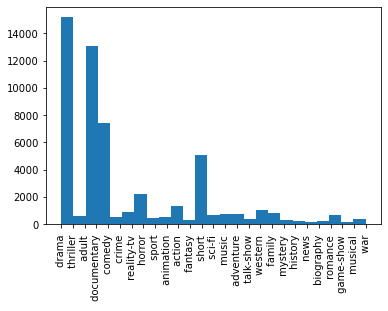

In [13]:
plt.hist(data['genre'],bins=25)
plt.xticks(rotation=90)
plt.show()

In [14]:
genres = data['genre'].unique()
plt.figure(figsize=(29,60))

<Figure size 2088x4320 with 0 Axes>

<Figure size 2088x4320 with 0 Axes>

In [15]:
data.drop(['id','title'],axis=1)
data.head()

,id,title,genre,desc,desc_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['genre_encd'] = label_encoder.fit_transform(data['genre'])
class_names = list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [19]:
data.head()

,id,title,genre,desc,desc_clean,genre_encd
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,8


In [20]:
x= data["desc_clean"]
y= data["genre"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)


In [21]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 = vectorize.transform(x_test)

In [22]:
vectorize = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 = vectorize.transform(x_test)

In [23]:
model = LogisticRegression()
model.fit(x_train2, y_train)
print("Model Score on Training Data", model.score(x_train2 , y_train))
print("Model Score on Test Data", model.score(x_test2 , y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred, y_test))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training Data 0.7079721105249567
Model Score on Test Data 0.5548382336665806


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.14      0.51      0.21       170
       adult        0.07      0.62      0.13        34
   adventure        0.07      0.69      0.13        42
   animation        0.01      1.00      0.02         2
   biography        0.00      0.00      0.00         0
      comedy        0.57      0.51      0.54      4142
       crime        0.00      0.00      0.00         0
 documentary        0.87      0.62      0.72      9244
       drama        0.81      0.50      0.62     10954
      family        0.01      0.56      0.03         9
     fantasy        0.00      0.00      0.00         0
   game-show        0.33      0.94      0.48        31
     history        0.00      0.00      0.00         0
      horror        0.44      0.71      0.54       696
       music        0.22      0.73      0.34       110
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
cm = confusion_matrix(y_test, y_pred)

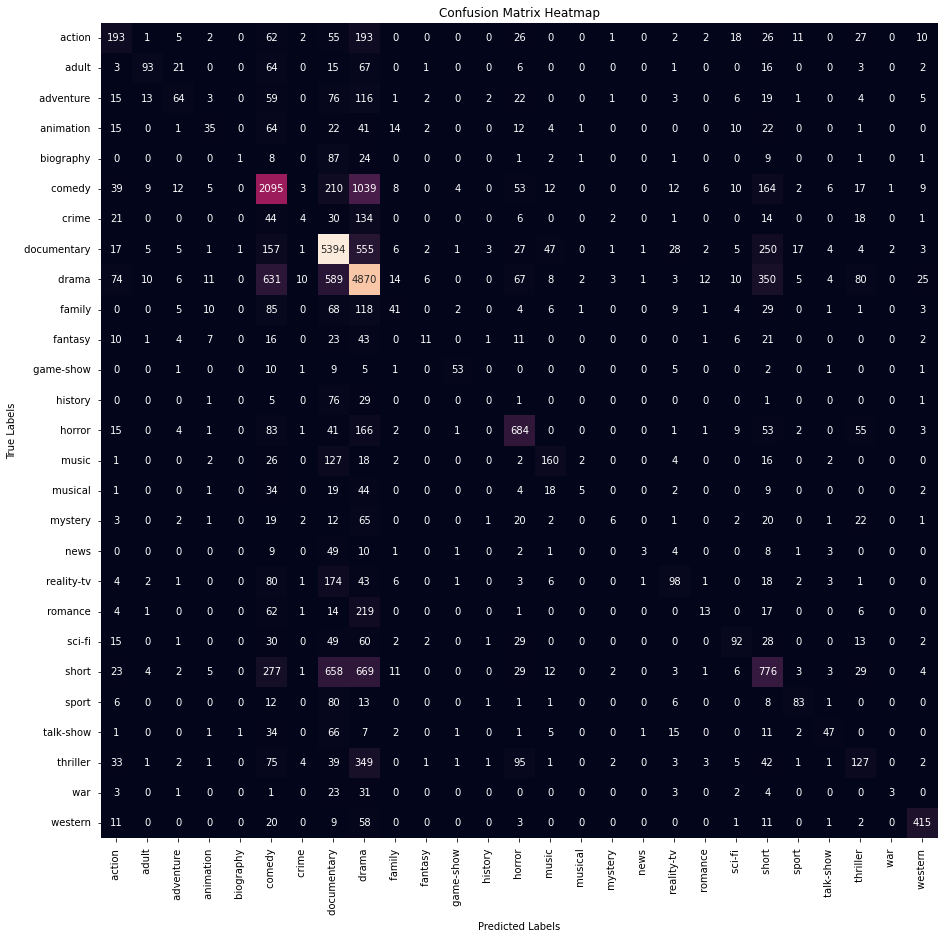

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
           xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [30]:
svm = LinearSVC()
svm.fit(x_train2,y_train)
print("Model Score on Training data", svm.score(x_train2,y_train))
print("Model Score on Test data", svm.score(x_test2,y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred,y_test))

Model Score on Training data 0.9929907403991589
Model Score on Test data 0.5668646475080238
               precision    recall  f1-score   support

      action        0.30      0.38      0.34       507
       adult        0.32      0.66      0.43       140
   adventure        0.16      0.47      0.23       137
   animation        0.14      0.40      0.21        87
   biography        0.01      0.33      0.01         3
      comedy        0.56      0.52      0.54      4062
       crime        0.01      0.13      0.03        31
 documentary        0.82      0.67      0.74      8014
       drama        0.72      0.54      0.62      8986
      family        0.11      0.37      0.16       111
     fantasy        0.07      0.41      0.12        27
   game-show        0.60      0.82      0.69        65
     history        0.00      0.00      0.00        10
      horror        0.61      0.62      0.61      1110
       music        0.44      0.56      0.49       285
     musical        0.04   

In [31]:
cm = confusion_matrix(y_test, y_pred)

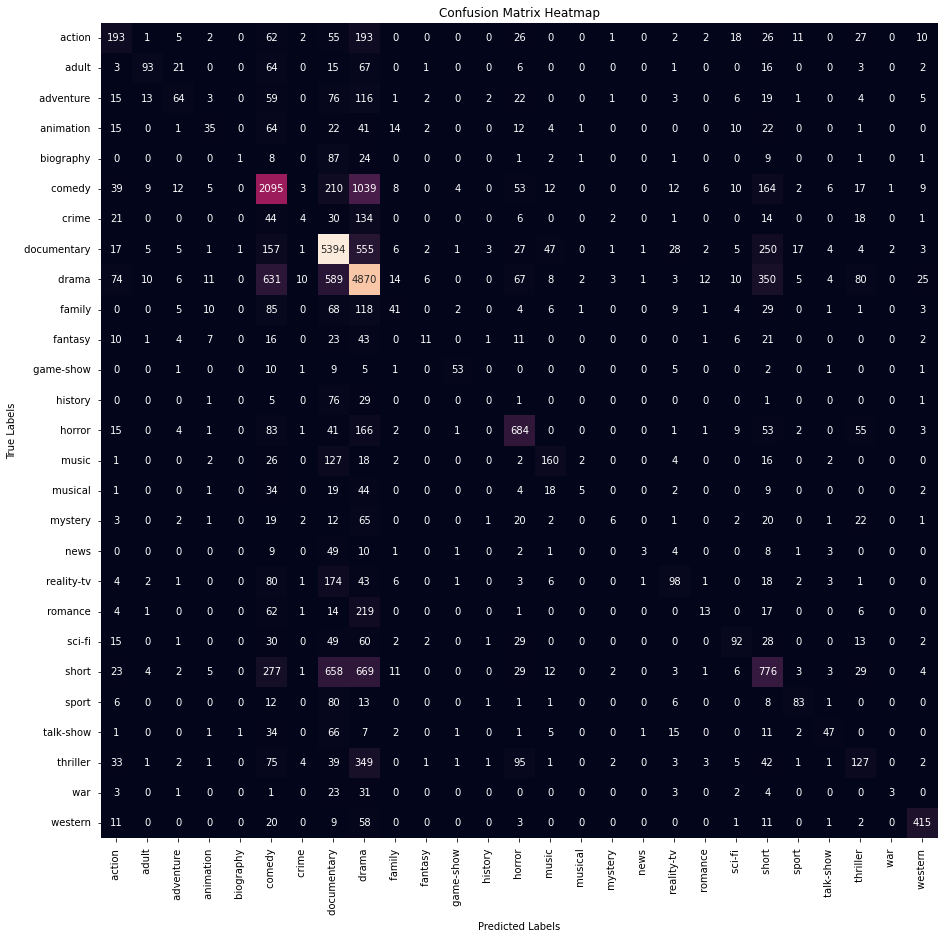

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
           xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()